# sample scientists
In this notebook, we visualize the publication topic characteristics of sample scientists from each of the four high/low EP/ED groups (**Figure 3**).

In [7]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt
from collections import OrderedDict
import pandas as pd
from collections import Counter

def save_pkl(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)
def load_pkl(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [8]:
occurence_m = load_pkl('../data/fig3/occurence_matrix.pkl')
def get_occur(a, b):
    '''
    Determine whether a, b co-occur.
    '''
    return occurence_m[num_genres[a], num_genres[b]]

In [9]:
code_dis_matrix, num_genres = load_pkl('/public/aps/summarized_data/co_code_dis.pkl')
def get_code_dis(a, b):
    '''
    Calculate the node distance between two PACS codes a and b.
    '''
    return code_dis_matrix[num_genres[a], num_genres[b]]

In [10]:
# the four selected scientists
behave = pd.read_csv('../data/regression/original_aps.csv')
behave = behave[behave.CareerYear <= 10]
colors = load_pkl('../data/fig3/colors.pkl')
four_group_names = ['Y. Yanase', 'M. S. Kalenkov', 'J. Goryo', 'C. Navau']
four_group_ids = [19366, 134451, 357702, 228780]

In [11]:
behave[behave.aid.isin(four_group_ids)]

,aid,date,paperDoi,citCount,paperCount,genres,logCit,CareerYear,cyCount,attempt_number
103216,134451,2000-09-01,10.1103/PhysRevB.62.6665,12,14,"['7450+r', '7425Nf', '7472-h']",2.564949,1,14,1
103217,134451,2004-11-12,10.1103/PhysRevB.70.184505,4,14,"['7472-h', '7445+c']",1.609438,5,14,2
103218,134451,2006-11-02,10.1103/PhysRevB.74.184502,0,14,"['7450+r', '7478Na', '7323Ra', '7445+c']",0.000000,7,14,3
103219,134451,2007-05-16,10.1103/PhysRevB.75.172503,24,14,"['7478Na', '7445+c', '7323-b']",3.218876,7,14,4
103220,134451,2007-12-07,10.1103/PhysRevB.76.224506,16,14,"['7478Na', '7445+c', '7323-b']",2.833213,8,14,5
103221,134451,2008-03-28,10.1103/PhysRevB.77.094520,15,14,"['7450+r', '7340-c', '7445+c']",2.772589,8,14,6
103222,134451,2009-01-29,10.1103/PhysRevB.79.014521,8,14,"['7478Na', '7445+c', '7323-b']",2.197225,9,14,7
103223,134451,2009-08-06,10.1103/PhysRevLett.103.067006,13,14,"['7478Na', '7445+c', '7323-b']",2.639057,9,14,8
103224,134451,2010-07-28,10.1103/PhysRevB.82.024522,2,14,"['7478Na', '7225Ba', '7445+c', '7323-b']",1.098612,10,14,9
273765,19366,2004-11-17,10.1103/PhysRevB.70.184515,8,11,"['7425Op', '7470Pq', '7425Bt']",2.197225,1,10,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

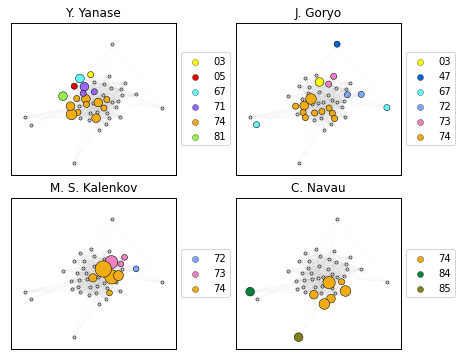

In [12]:
# high low; low low; low high; high high
node_weight = {}
all_nodes = set([])
for g in behave[behave.aid.isin(four_group_ids)].genres:
    all_nodes = all_nodes | set(eval(g))

G = nx.Graph()
for node1 in all_nodes:
    for node2 in all_nodes:
        if get_occur(node1, node2) > 0:
            node_weight[node1, node2] = (1-get_code_dis(node1, node2))**1.1
            G.add_edge(node1, node2, weight=node_weight[node1, node2])

G.remove_edges_from(nx.selfloop_edges(G))

# ----- start draw---------

pos = load_pkl('../data/fig3/pos_47626.pkl')

node_labels = nx.get_node_attributes(G, 'label')
label_list = list(set([int(v) for v in node_labels.values()]))

fig, ax = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.36, hspace=0.15)

id_list = [0, 2, 1, 3]
for k in range(4):
    ax[k//2][k % 2].set_yticks([])
    ax[k//2][k % 2].set_xticks([])
    subp = '22'+str(k+1)
    ax1 = fig.add_subplot(int(subp))

    i = id_list[k]
    ids = four_group_ids[i]

    node_list = [i for p in behave[behave.aid == ids].genres for i in eval(p)]

    node_size = [int(Counter(node_list)[g]) /
                 len(behave[behave.aid == ids].genres)*300 for g in G.nodes()]
    node_color = [colors[int(g[:2])] for g in G.nodes()]

    nx.draw_networkx_edges(G, pos, width=0.1, edge_color=(
        200/255, 200/255, 200/255, 1.00), alpha=0.8, label=node_labels)
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color=(
        200/255, 200/255, 200/255, 1.00), alpha=1.0, linewidths=0.5, edgecolors='black')
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color,
                           alpha=1.0, linewidths=0.5, edgecolors='black')

    plt.ylim((-1.2, 1.3))

    ax2 = ax1.twinx()
    plt.yticks([])
    for n in node_list:
        plt.scatter([], [], color=colors[int(n[:2])],
                    linewidths=0.3, edgecolors='black', label=n[:2])

    handles, labels = ax2.get_legend_handles_labels()
    dd = dict(zip(labels, handles))
    by_label = OrderedDict(sorted(dd.items(), key=lambda t: t[0]))

    plt.legend(by_label.values(), by_label.keys(),
               loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    ax1.set_yticks([])
    plt.ylim((-1.2, 1.3))
    plt.title(four_group_names[i])

plt.savefig('./draw/figure_3.png', format="png", bbox_inches="tight")